Install Pytorch package (need to specify the version to get correctly installed. Possible error will lead died kernal.
)

In [1]:
# pip install torch==1.11.0 torchvision==0.12.0 torchaudio==0.11.0

The RNN model with PyTorch will be implemented on the Metadata only to farmiliarize myself with the PyTorch library and get starts with RNN. First of all, we need to treat each patient as an observation and get every 

In [2]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from sklearn import metrics

A better explanation about the RNN example https://blog.floydhub.com/a-beginners-guide-on-recurrent-neural-networks-with-pytorch/

# Read in data sets

In [3]:
mydata = pd.read_csv('/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/metadata_imputed1.csv', delimiter=',')
mydata = pd.DataFrame(mydata)
mydata

,participant_id,project,specimen,was_term,delivery_wk,collect_wk,race,age,NIH.Racial.Category,NIH.Ethnicity.Category,was_preterm,was_early_preterm,collect_tri,age_imp,race_imp,age_imp_cat
0,A00001,A,A00001-05,True,38,33,American Indian,Unknown,American Indian or Alaska Native,Unknown,False,False,3,27,American Indian or Alaska Native,from_18_to_28
1,A00002,A,A00002-01,True,40,38,White,Unknown,White,Unknown,False,False,3,24,White,from_18_to_28
2,A00003,A,A00003-02,True,40,30,Asian-Japanese,Unknown,Asian,Unknown,False,False,3,32,Asian,from_29_to_38
3,A00004,A,A00004-08,True,40,27,White,Unknown,White,Unknown,False,False,3,25,White,from_18_to_28
4,A00004,A,A00004-12,True,40,29,White,Unknown,White,Unknown,False,False,3,25,White,from_18_to_28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J00111,J,J00111-01,True,40,17,Caucasian,27,White,Unknown,False,False,2,27,White,from_18_to_28
3574,J00112,J,J00112-01,True,39,19,Caucasian,27,White,Unknown,False,False,2,27,White,from_18_to_28
3575,J00113,J,J00113-01,True,41,16,Caucasian,32,White,Unknown,False,False,2,32,White,from_29_to_38
3576,J00115,J,J00115-01,True,42,18,Caucasian,35,White,Unknown,False,False,2,35,White,from_29_to_38


In [4]:
mydata_alpha = pd.read_csv('/Users/mli171/Desktop/JHU/3Summer2022_JHU/DREAM/training_data_2022-05-27/alpha_diversity/alpha_diversity.csv', delimiter=',')
mydata_alpha = pd.DataFrame(mydata_alpha)
mydata_alpha

,specimen,shannon,inv_simpson,bwpd,phylo_entropy,quadratic,unrooted_pd,rooted_pd
0,A00001-05,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.53935
1,A00002-01,1.96362,1.81277,2.628940,1.318870,0.876314,3.943410,4.14816
2,A00003-02,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.62632
3,A00004-08,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,1.83870
4,A00004-12,6.94884,4.07385,2.788960,3.134220,1.219900,15.518500,15.58460
...,...,...,...,...,...,...,...,...
3573,J00111-01,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.25993
3574,J00112-01,1.00149,1.00108,0.008313,0.002881,0.002078,0.008313,1.93897
3575,J00113-01,3.05187,2.53112,3.399690,2.177080,1.180320,6.952930,7.15767
3576,J00115-01,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.26097


Combine two data sets together.

In [5]:
mydata = pd.concat([mydata, mydata_alpha], axis=1)
mydata

,participant_id,project,specimen,was_term,delivery_wk,collect_wk,race,age,NIH.Racial.Category,NIH.Ethnicity.Category,...,race_imp,age_imp_cat,specimen,shannon,inv_simpson,bwpd,phylo_entropy,quadratic,unrooted_pd,rooted_pd
0,A00001,A,A00001-05,True,38,33,American Indian,Unknown,American Indian or Alaska Native,Unknown,...,American Indian or Alaska Native,from_18_to_28,A00001-05,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.53935
1,A00002,A,A00002-01,True,40,38,White,Unknown,White,Unknown,...,White,from_18_to_28,A00002-01,1.96362,1.81277,2.628940,1.318870,0.876314,3.943410,4.14816
2,A00003,A,A00003-02,True,40,30,Asian-Japanese,Unknown,Asian,Unknown,...,Asian,from_29_to_38,A00003-02,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.62632
3,A00004,A,A00004-08,True,40,27,White,Unknown,White,Unknown,...,White,from_18_to_28,A00004-08,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,1.83870
4,A00004,A,A00004-12,True,40,29,White,Unknown,White,Unknown,...,White,from_18_to_28,A00004-12,6.94884,4.07385,2.788960,3.134220,1.219900,15.518500,15.58460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3573,J00111,J,J00111-01,True,40,17,Caucasian,27,White,Unknown,...,White,from_18_to_28,J00111-01,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.25993
3574,J00112,J,J00112-01,True,39,19,Caucasian,27,White,Unknown,...,White,from_18_to_28,J00112-01,1.00149,1.00108,0.008313,0.002881,0.002078,0.008313,1.93897
3575,J00113,J,J00113-01,True,41,16,Caucasian,32,White,Unknown,...,White,from_29_to_38,J00113-01,3.05187,2.53112,3.399690,2.177080,1.180320,6.952930,7.15767
3576,J00115,J,J00115-01,True,42,18,Caucasian,35,White,Unknown,...,White,from_29_to_38,J00115-01,1.00000,1.00000,0.000000,-0.000000,0.000000,0.000000,2.26097


We add 1 on *race_imp* and *age_imp_cat* to indicate category start from 1 since 0 will be used for indicating missing values (Nan).

In [6]:
mydata = mydata[["participant_id", "project", "specimen", "collect_wk", 
                 "was_preterm", "was_early_preterm", "race_imp", "age_imp_cat", "shannon"]]
mydata["project"] = mydata["project"].astype('category').cat.codes

# add 1 to indicate category start from 1
mydata["race_imp"] = mydata["race_imp"].astype('category').cat.codes + 1
mydata["age_imp_cat"] = mydata["age_imp_cat"].astype('category').cat.codes + 1

mydata['was_preterm'] = mydata['was_preterm'].astype('int8')
mydata['was_early_preterm'] = mydata['was_early_preterm'].astype('int8')
mydata.dtypes

/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_22783/3780121403.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata["project"] = mydata["project"].astype('category').cat.codes
/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_22783/3780121403.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata["race_imp"] = mydata["race_imp"].astype('category').cat.codes + 1
/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_22783/3780121403.py:7: SettingWithCopyWarning: 
A value i

participant_id        object
project                 int8
specimen              object
specimen              object
collect_wk             int64
was_preterm             int8
was_early_preterm       int8
race_imp                int8
age_imp_cat             int8
shannon              float64
dtype: object

In [7]:
mydata.describe

<bound method NDFrame.describe of      participant_id  project   specimen   specimen  collect_wk  was_preterm  \
0            A00001        0  A00001-05  A00001-05          33            0   
1            A00002        0  A00002-01  A00002-01          38            0   
2            A00003        0  A00003-02  A00003-02          30            0   
3            A00004        0  A00004-08  A00004-08          27            0   
4            A00004        0  A00004-12  A00004-12          29            0   
...             ...      ...        ...        ...         ...          ...   
3573         J00111        9  J00111-01  J00111-01          17            0   
3574         J00112        9  J00112-01  J00112-01          19            0   
3575         J00113        9  J00113-01  J00113-01          16            0   
3576         J00115        9  J00115-01  J00115-01          18            0   
3577         J00116        9  J00116-01  J00116-01          17            0   

      was_early_p

We split the training and testing data set based on *project* J.

In [8]:
mydata_train = mydata[mydata['project']!=9] # Not project J
mydata_test  = mydata[mydata['project']==9] # project J

We want to predict the class of preterm birth and early preterm birth for few consecutive specimemns collected. We will have to define the

- Input data (3 covariates)
    - The meta data (imputed age and race category) for each observation
    - The alpha_diversity (shannon index) for each observation
- Output (1 covariate)
    - The class label of preterm birth/early preterm birth
    
via data pre-processing and move the data from numpy arrays to Pytorch data structure - **Torch Tensors**

In [9]:
input_num_covariates = 3
output_num_covariates = 2

# Preterm birth

The RNN model with two covariates, *age_imp_cat* and *race_imp* are included. 

Some data filtering first.

1. Only keep the rows with collect_wk < 37 for Preterm task

In [10]:
mydata1 = mydata_train.loc[mydata_train['collect_wk']<37,]
mydata1.shape

(3381, 10)

2. Delete the duplicated samples in the same collection week

In [11]:
mydata2 = mydata1.drop_duplicates(subset=['participant_id', 'collect_wk'], keep='first')
mydata2.shape

(2417, 10)

Note: Too much samples are deleted, we need to take care of this situation. For metadata table, its OK since the information of duplicates are exactly same. But it will be specimen specific for taxonomy, phylotypes and distance data sets. **We need to discuss it**. We need to either form up some summary statistic for multiple collected sample in the same week or other methods (???).

Since we will give a patient the label of preterm birth as the delievey week < 37, we have $L=36$ as one of the dimension for the tensor, which is the sequence length (number of time points). 

## Input data

### Input data from categorical age

Here, we assume age category for each patient doesn't change during the pregency months, which is **not time varying**. Therefore, each row in the below are 36 constant for variable *age_imp_cat*.

In [12]:
mydata2_wide_age = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='age_imp_cat')
# sort by collect_wk
mydata2_wide_age = mydata2_wide_age.sort_index(axis=1)
# mydata2_wide_age = mydata2_wide_age.fillna(0)
mydata2_wide_age = mydata2_wide_age.T.fillna(mydata2_wide_age.max(axis=1)).T
mydata2_wide_age

collect_wk,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
participant_id,,,,,,,,,,,,,,,,,,,,,
A00001,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
A00003,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
A00004,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
A00005,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
A00006,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I00534,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
I00535,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
I00536,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Input data from categorical race

Similarly, race category for each patient is also **not time varying**. Therefore, each row in the below are 36 constant for variable *race_imp*.

In [13]:
mydata2_wide_race = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='race_imp')
# sort by collect_wk
mydata2_wide_race = mydata2_wide_race.sort_index(axis=1)
# mydata2_wide_race = mydata2_wide_race.fillna(0)
mydata2_wide_race = mydata2_wide_race.T.fillna(mydata2_wide_race.max(axis=1)).T
mydata2_wide_race

collect_wk,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
participant_id,,,,,,,,,,,,,,,,,,,,,
A00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
A00003,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
A00004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
A00005,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
A00006,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I00534,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
I00535,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
I00536,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0


### Input data from alpha_diversity (Shannon index)

The variable of *alpha_diversity* for each patient is **time varying**. For each patient/each row, the patient will have different values. If there is NaN value, fill with 0.

In [14]:
mydata2_wide_shannon = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='shannon')
# sort by collect_wk
mydata2_wide_shannon = mydata2_wide_shannon.sort_index(axis=1)
mydata2_wide_shannon = mydata2_wide_shannon.fillna(0)
mydata2_wide_shannon

collect_wk,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
participant_id,,,,,,,,,,,,,,,,,,,,,
A00001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.00000,0.0,0.0,1.00000,0.0,0.00000,0.00000
A00003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,1.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000
A00004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,6.94884,3.04127,0.0,0.0,1.00000,0.0,2.07470,0.00000
A00005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.00000,0.00000,0.0,0.0,0.00000,0.0,2.49608,6.05325
A00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.00000,1.0,0.0,1.88744,0.0,0.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I00534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000
I00535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000
I00536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00000,0.00000,0.0,0.0,0.00000,0.0,0.00000,0.00000


### Form input tensor for RNN

In [15]:
batch_size, seq_length = mydata2_wide_shannon.shape
mytrain_input = np.zeros((batch_size, seq_length, input_num_covariates), dtype=np.float32)
for i in range(batch_size):
    mytrain_input[i,:,0] = mydata2_wide_age.iloc[[i]]
    mytrain_input[i,:,1] = mydata2_wide_race.iloc[[i]]
    mytrain_input[i,:,2] = mydata2_wide_shannon.iloc[[i]]
# change to rnn input format
input_seq = torch.from_numpy(mytrain_input)
print(input_seq.shape)
input_seq

torch.Size([1174, 36, 3])


tensor([[[3.0000, 1.0000, 0.0000],
         [3.0000, 1.0000, 0.0000],
         [3.0000, 1.0000, 0.0000],
         ...,
         [3.0000, 1.0000, 0.0000],
         [3.0000, 1.0000, 0.0000],
         [3.0000, 1.0000, 0.0000]],

        [[4.0000, 2.0000, 0.0000],
         [4.0000, 2.0000, 0.0000],
         [4.0000, 2.0000, 0.0000],
         ...,
         [4.0000, 2.0000, 0.0000],
         [4.0000, 2.0000, 0.0000],
         [4.0000, 2.0000, 0.0000]],

        [[3.0000, 5.0000, 0.0000],
         [3.0000, 5.0000, 0.0000],
         [3.0000, 5.0000, 0.0000],
         ...,
         [3.0000, 5.0000, 0.0000],
         [3.0000, 5.0000, 2.0747],
         [3.0000, 5.0000, 0.0000]],

        ...,

        [[3.0000, 3.0000, 0.0000],
         [3.0000, 3.0000, 0.0000],
         [3.0000, 3.0000, 0.0000],
         ...,
         [3.0000, 3.0000, 0.0000],
         [3.0000, 3.0000, 0.0000],
         [3.0000, 3.0000, 0.0000]],

        [[4.0000, 3.0000, 0.0000],
         [4.0000, 3.0000, 0.0000],
         [4.

## Output data from Preterm birth label

1. Linear smoothed class label for Only class 1
- For class 0 (not preterm): 
- For class 1 (preterm): from starting week (0.5) to last collection week (1) and keep label 1 for the rest labels;

In [16]:
mydata2_wide_Y = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='was_preterm')
# sort by collect_wk
mydata2_wide_Y = mydata2_wide_Y.sort_index(axis=1)
mydata2_wide_Y = mydata2_wide_Y.apply(lambda row: row.fillna(row.mean()), axis=1)

output_seq = np.ones((batch_size, seq_length, output_num_covariates), dtype=np.float32)
for i in range(batch_size):
    tmp = mydata2_wide_Y.iloc[i,:]
    if max(tmp) == 1:
        # label linear smoonthing
        lastmax = np.argmax(tmp.cumsum())  # last maximum 1
        output_seq[i,range(lastmax),0] = np.linspace(start=0.5, stop=1, num=lastmax)
    else:
        # just 0
        output_seq[i,:,0] = tmp
    output_seq[i,:,1] = 1-output_seq[i,:,0]
        
# change to rnn input format
output_seq = torch.from_numpy(output_seq)
print(output_seq.shape)
print(output_seq[1]) # label 0
print(output_seq[5]) # label 1 

torch.Size([1174, 36, 2])
tensor([[0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.],
        [0., 1.]])
tensor([[0.5000, 0.5000],
        [0.5147, 0.4853],
        [0.5294, 0.4706],
        [0.5441, 0.4559],
        [0.5588, 0.4412],
        [0.5735, 0.4265],
        [0.5882, 0.4118],
        [0.6029, 0.3971],
        [0.6176, 0.3824],
        [0.6324, 0.3676],
        [0.6471, 0.3529],
        [0.6618, 0.3382],
        [0.67

2. Linear smoothed class label for class 0 and 1
- For class 0 (not preterm): from starting week (0.5) to last collection week (0) and keep label 0 for the rest labels;
- For class 1 (preterm): from starting week (0.5) to last collection week (1) and keep label 1 for the rest labels;

Since the second smoothing label applied later, the model trainning used 2nd approach.

In [17]:
mydata2_wide_Y = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='was_preterm')
# sort by collect_wk
mydata2_wide_Y = mydata2_wide_Y.sort_index(axis=1)

output_seq = np.zeros((batch_size, seq_length, output_num_covariates), dtype=np.float32)
for i in range(batch_size):
    tmp = mydata2_wide_Y.iloc[i,:]
    flag = np.argmax(tmp.cumsum()) # first non na used for class 0
    if np.nanmax(tmp) == 1:
        # fill all position 1 to have final labels equal to 1
        output_seq[i,:,0].fill(1)
        # label linear smoonthing from 0.5 to 1
        lastobs = np.argmax(tmp.cumsum())  # last non-zero element
        output_seq[i,range(lastobs),0] = np.linspace(start=0.5, stop=1, num=lastobs)
    else:
        # fill all position 0 to have final labels equal to 0 (but array alrady initialize as 0)
        # label linear smoonthing from 0.5 to 0
        output_seq[i,range(flag),0] = np.linspace(start=0.5, stop=0, num=flag)
        
    output_seq[i,:,1] = 1-output_seq[i,:,0]
        
# change to rnn input format
output_seq = torch.from_numpy(output_seq)
print(output_seq.shape)
print(output_seq[1].T) # label 1 
print(output_seq[5].T)

torch.Size([1174, 36, 2])
tensor([[0.5000, 0.4821, 0.4643, 0.4464, 0.4286, 0.4107, 0.3929, 0.3750, 0.3571,
         0.3393, 0.3214, 0.3036, 0.2857, 0.2679, 0.2500, 0.2321, 0.2143, 0.1964,
         0.1786, 0.1607, 0.1429, 0.1250, 0.1071, 0.0893, 0.0714, 0.0536, 0.0357,
         0.0179, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5179, 0.5357, 0.5536, 0.5714, 0.5893, 0.6071, 0.6250, 0.6429,
         0.6607, 0.6786, 0.6964, 0.7143, 0.7321, 0.7500, 0.7679, 0.7857, 0.8036,
         0.8214, 0.8393, 0.8571, 0.8750, 0.8929, 0.9107, 0.9286, 0.9464, 0.9643,
         0.9821, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])
tensor([[0.5000, 0.5156, 0.5312, 0.5469, 0.5625, 0.5781, 0.5938, 0.6094, 0.6250,
         0.6406, 0.6562, 0.6719, 0.6875, 0.7031, 0.7188, 0.7344, 0.7500, 0.7656,
         0.7812, 0.7969, 0.8125, 0.8281, 0.8438, 0.8594, 0.8750, 0.8906, 0.9062,
         0.9219, 0.9375, 0.9531, 0.9688, 0.9844, 1.0000, 1.0000, 1.0000, 1.0000]

In [18]:
mydata2_wide_Y = mydata2.pivot_table(index=['participant_id'], columns='collect_wk', values='was_preterm')
# sort by collect_wk
mydata2_wide_Y = mydata2_wide_Y.sort_index(axis=1)

output_seq = np.zeros((batch_size, seq_length, output_num_covariates), dtype=np.float32)

for i in range(batch_size):
    tmp = mydata2_wide_Y.iloc[i,:]
    flag = tmp.last_valid_index() # last non NaN for patient i
    if np.nanmax(tmp) == 1:
        # label linear smoonthing from 0.5 to 1
        # fill all position 1 to have final labels equal to 1
        output_seq[i,:,0].fill(1)
        output_seq[i,range(flag),0] = np.linspace(start=0.5, stop=1, num=flag)
    else:
        # label linear smoonthing from 0.5 to 0
        # fill all position 0 to have final labels equal to 0 
        #     but array alrady initialize as 0
        output_seq[i,range(flag),0] = np.linspace(start=0.5, stop=0, num=flag)
        
    output_seq[i,:,1] = 1-output_seq[i,:,0]
    
# change to rnn input format
output_seq = torch.from_numpy(output_seq)
print(output_seq.shape)
print(output_seq[1].T) # label 1 
print(output_seq[5].T)

torch.Size([1174, 36, 2])
tensor([[0.5000, 0.4828, 0.4655, 0.4483, 0.4310, 0.4138, 0.3966, 0.3793, 0.3621,
         0.3448, 0.3276, 0.3103, 0.2931, 0.2759, 0.2586, 0.2414, 0.2241, 0.2069,
         0.1897, 0.1724, 0.1552, 0.1379, 0.1207, 0.1034, 0.0862, 0.0690, 0.0517,
         0.0345, 0.0172, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5172, 0.5345, 0.5517, 0.5690, 0.5862, 0.6034, 0.6207, 0.6379,
         0.6552, 0.6724, 0.6897, 0.7069, 0.7241, 0.7414, 0.7586, 0.7759, 0.7931,
         0.8103, 0.8276, 0.8448, 0.8621, 0.8793, 0.8966, 0.9138, 0.9310, 0.9483,
         0.9655, 0.9828, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000]])
tensor([[0.5000, 0.5152, 0.5303, 0.5455, 0.5606, 0.5758, 0.5909, 0.6061, 0.6212,
         0.6364, 0.6515, 0.6667, 0.6818, 0.6970, 0.7121, 0.7273, 0.7424, 0.7576,
         0.7727, 0.7879, 0.8030, 0.8182, 0.8333, 0.8485, 0.8636, 0.8788, 0.8939,
         0.9091, 0.9242, 0.9394, 0.9545, 0.9697, 0.9848, 1.0000, 1.0000, 1.0000]

In [19]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [20]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        # Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)

    def forward(self, x):
        
        batch_size = x.size(0)

        #Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        # print(out.shape)
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim).to(device)
         # We'll send the tensor holding the hidden state to the device we specified earlier as well
        return hidden

In [21]:
# Instantiate the model with hyperparameters
model = Model(input_size=input_num_covariates, output_size=output_num_covariates, hidden_dim=18, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model = model.to(device)

# Define hyperparameters
n_epochs = 500
lr=0.01

# Define Loss, Optimizer
# criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [22]:
# Training Run
input_seq = input_seq.to(device)
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    #input_seq = input_seq.to(device)
    output, hidden = model(input_seq)
    output_seq = output_seq.to(device)
    loss = criterion(output, output_seq.view(-1, output_num_covariates))
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

Epoch: 10/500............. Loss: 0.1760
Epoch: 20/500............. Loss: 0.1443
Epoch: 30/500............. Loss: 0.1350
Epoch: 40/500............. Loss: 0.1319
Epoch: 50/500............. Loss: 0.1304
Epoch: 60/500............. Loss: 0.1297
Epoch: 70/500............. Loss: 0.1293
Epoch: 80/500............. Loss: 0.1291
Epoch: 90/500............. Loss: 0.1288
Epoch: 100/500............. Loss: 0.1286
Epoch: 110/500............. Loss: 0.1283
Epoch: 120/500............. Loss: 0.1279
Epoch: 130/500............. Loss: 0.1274
Epoch: 140/500............. Loss: 0.1269
Epoch: 150/500............. Loss: 0.1265
Epoch: 160/500............. Loss: 0.1261
Epoch: 170/500............. Loss: 0.1258
Epoch: 180/500............. Loss: 0.1273
Epoch: 190/500............. Loss: 0.1264
Epoch: 200/500............. Loss: 0.1256
Epoch: 210/500............. Loss: 0.1252
Epoch: 220/500............. Loss: 0.1249
Epoch: 230/500............. Loss: 0.1247
Epoch: 240/500............. Loss: 0.1244
Epoch: 250/500...........

# Apply back to the training set.

In [23]:
# define a function to print all elements in array
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [24]:
model.eval() # eval mode

pred_prob = []
predicted_labels = []
for ii in range(batch_size):
    mytrain_input_one = mytrain_input[ii]
    lastobs = np.argmax(mytrain_input_one[:,2].cumsum())
    mytrain_input_one = torch.Tensor([mytrain_input_one])
    out, hidden = model(mytrain_input_one)
    prob = nn.functional.softmax(out, dim=1).data[:,0].numpy()
    
    #----- Using the highest predicted probability to generate label
    # prob_max = torch.max(prob).item()
    # print(prob_max)
    # pred_label = 1*(prob_max < 0.5)
    
    #----- Using the predicted probability of the last sample-collected week to generate label
    prob_obs = prob[lastobs]
    pred_label = 1*(prob_obs > 0.5)
    pred_prob.append(prob_obs)
    predicted_labels.append(pred_label)

/var/folders/xy/ccg9zpjj4sq_l6d6fypc_5740000gn/T/ipykernel_22783/3108587336.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /Users/distiller/project/pytorch/torch/csrc/utils/tensor_new.cpp:210.)
  mytrain_input_one = torch.Tensor([mytrain_input_one])


In [25]:
actual_labels = mydata2_wide_Y.mean(axis=1)
pred_res = pd.DataFrame({'prob': pred_prob, 'pred': predicted_labels, "obs": actual_labels})

# uncomment this self-defined function to print all elements in pred_res
# print_full(pred_res)

In [26]:
my_accuracy = metrics.accuracy_score(actual_labels, predicted_labels, normalize=False) / float(actual_labels.size)
my_accuracy

0.6771720613287905

# Apply the simple RNN on testing set.

In [27]:
testset = mydata_test[["participant_id", "project", "specimen", "collect_wk", 
                       "was_preterm", "was_early_preterm", "race_imp", "age_imp_cat", "shannon"]]

The proportion of preterm in testing set.

In [28]:
testset['was_preterm'].mean()

0.18072289156626506

Same filtering applied.

In [29]:
# only keep the rows with collect_wk < 37 for Preterm task
testset1 = testset.loc[testset['collect_wk']<37,]

# delete the duplicated samples in the same collection week
testset2 = testset1.drop_duplicates(subset=['participant_id', 'collect_wk'], keep='first')
testset2.shape

(83, 10)

In [30]:
testset2_wide_age = testset2.pivot_table(index=['participant_id'], columns='collect_wk', values='age_imp_cat')
# sort by collect_wk
testset2_wide_age = testset2_wide_age.sort_index(axis=1)
# testset2_wide_age = testset2_wide_age.fillna(0)
testset2_wide_age = testset2_wide_age.T.fillna(testset2_wide_age.max(axis=1)).T
testset2_wide_age

collect_wk,12,13,14,15,16,17,18,19
participant_id,,,,,,,,
J00001,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
J00004,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
J00007,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
J00008,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
J00010,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...
J00111,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
J00112,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
J00113,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


In [31]:
testset2_wide_race = testset2.pivot_table(index=['participant_id'], columns='collect_wk', values='race_imp')
# sort by collect_wk
testset2_wide_race = testset2_wide_race.sort_index(axis=1)
# testset2_wide_race = testset2_wide_race.fillna(0)
testset2_wide_race = testset2_wide_race.T.fillna(testset2_wide_race.max(axis=1)).T
testset2_wide_race

collect_wk,12,13,14,15,16,17,18,19
participant_id,,,,,,,,
J00001,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
J00004,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
J00007,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
J00008,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
J00010,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
J00111,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
J00112,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
J00113,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


In [32]:
testset2_wide_shannon = testset2.pivot_table(index=['participant_id'], columns='collect_wk', values='shannon')
# sort by collect_wk
testset2_wide_shannon = testset2_wide_shannon.sort_index(axis=1)
testset2_wide_shannon = testset2_wide_shannon.fillna(0)
testset2_wide_shannon

collect_wk,12,13,14,15,16,17,18,19
participant_id,,,,,,,,
J00001,0.0,0.0,0.00000,0.0,0.00000,0.00000,1.0,0.00000
J00004,0.0,0.0,0.00000,0.0,0.00000,1.25278,0.0,0.00000
J00007,0.0,0.0,0.00000,0.0,1.00000,0.00000,0.0,0.00000
J00008,0.0,0.0,0.00000,0.0,0.00000,0.00000,1.0,0.00000
J00010,0.0,0.0,2.09082,0.0,0.00000,0.00000,0.0,0.00000
...,...,...,...,...,...,...,...,...
J00111,0.0,0.0,0.00000,0.0,0.00000,1.00000,0.0,0.00000
J00112,0.0,0.0,0.00000,0.0,0.00000,0.00000,0.0,1.00149
J00113,0.0,0.0,0.00000,0.0,3.05187,0.00000,0.0,0.00000


Fill-in zeros for empty collection weeks.

In [33]:
test_batch_size = testset2_wide_shannon.shape[0]
# get column for available collect_wk's
test_index = testset2_wide_shannon._get_numeric_data().columns.values - 1 # index starting from 0
test_index = test_index.tolist()
mytest_input = np.zeros((test_batch_size, seq_length, input_num_covariates), dtype=np.float32)

for i in range(test_batch_size):
    mytest_input[i,:,0] = testset2_wide_age.iloc[i,1]
    mytest_input[i,:,1] = testset2_wide_race.iloc[i,1]
    mytest_input[i,test_index,2] = testset2_wide_shannon.iloc[[i]]


Prediction through the trainned network. Here, we use the probability associated with the last collection week to predict class label.

In [34]:
model.eval() # eval mode

pred_prob = []
predicted_labels = []
for ii in range(test_batch_size):
    mytest_input_one = mytest_input[ii]
    lastobs = np.argmax(mytest_input_one[:,2].cumsum())
    mytest_input_one = torch.Tensor([mytest_input_one])
    out, hidden = model(mytest_input_one)
    prob = nn.functional.softmax(out, dim=1).data[:,0].numpy()
    
    #----- Using the highest predicted probability to generate label
    # prob_max = torch.max(prob).item()
    # print(prob_max)
    # pred_label = 1*(prob_max > 0.5)
    
    #----- Using the predicted probability of the last sample-collected week to generate label
    prob_obs = prob[lastobs]
    pred_label = 1*(prob_obs > 0.5)
    pred_prob.append(prob_obs)
    predicted_labels.append(pred_label)

In [35]:
testset2_wide_Y = testset2.pivot_table(index=['participant_id'], columns='collect_wk', values='was_preterm')
# sort by collect_wk
testset2_wide_Y = testset2_wide_Y.sort_index(axis=1)
actual_labels = testset2_wide_Y.mean(axis=1)

pred_res = pd.DataFrame({'prob': pred_prob, 'pred': predicted_labels, "obs": actual_labels})
print_full(pred_res)

                    prob  pred  obs
participant_id                     
J00001          0.523153     1  0.0
J00004          0.447048     0  0.0
J00007          0.502631     1  0.0
J00008          0.450507     0  0.0
J00010          0.572330     1  0.0
J00011          0.440346     0  0.0
J00012          0.450507     0  0.0
J00013          0.427740     0  0.0
J00014          0.516524     1  1.0
J00015          0.450682     0  0.0
J00016          0.576654     1  0.0
J00018          0.398567     0  0.0
J00019          0.574696     1  1.0
J00020          0.524097     1  0.0
J00022          0.450902     0  0.0
J00023          0.450300     0  0.0
J00024          0.501282     1  1.0
J00025          0.525169     1  0.0
J00026          0.502631     1  0.0
J00027          0.450902     0  0.0
J00028          0.632713     1  0.0
J00029          0.516538     1  1.0
J00030          0.424743     0  0.0
J00031          0.450613     0  0.0
J00032          0.452538     0  0.0
J00033          0.451740    

Note: since we only involved *age_imp_cat* in this baby RNN model, all patients in project J are poredicted to not have preterm with a very small p-value.

### Accuracy

In [36]:
my_accuracy = metrics.accuracy_score(actual_labels, predicted_labels, normalize=False) / float(actual_labels.size)
my_accuracy

0.6867469879518072

### Confusion matrix

In [37]:
confusion = metrics.confusion_matrix(actual_labels, predicted_labels)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[51 17]
 [ 9  6]]


**Specificity**: When the actual value is negative, how often is the prediction correct?
 - Something we want to maximize
 - How "specific" (or "selective") is the classifier in predicting positive instances?
 - TN / all negative
     - all negative = TN + FP

In [38]:
specificity = TN / (TN + FP)

print(specificity)

0.75


**False Positive Rate**: When the actual value is negative, how often is the prediction incorrect?

In [39]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.25
0.25


**Precision**: When a positive value is predicted, how often is the prediction correct?
- How "precise" is the classifier when predicting positive instances (preterm/early_preterm)?

In [40]:
precision = TP / float(TP + FP)
print(precision)

0.2608695652173913


### Receiver Operating Characteristic (ROC) Curves

In [41]:
fpr, tpr, thresholds = metrics.roc_curve(actual_labels, pred_prob)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.01470588 0.01470588 0.04411765 0.04411765 0.07352941
 0.10294118 0.17647059 0.17647059 0.22058824 0.25       0.25
 0.30882353 0.30882353 0.35294118 0.41176471 0.41176471 0.47058824
 0.52941176 0.89705882 0.89705882 0.91176471 0.91176471 0.95588235
 0.95588235 0.98529412 0.98529412 1.        ]
[0.         0.         0.06666667 0.06666667 0.13333333 0.13333333
 0.13333333 0.13333333 0.26666667 0.26666667 0.26666667 0.4
 0.4        0.53333333 0.66666667 0.66666667 0.73333333 0.73333333
 0.73333333 0.73333333 0.8        0.8        0.86666667 0.86666667
 0.93333333 0.93333333 1.         1.        ]
[1.6327131  0.63271314 0.6241187  0.5766541  0.57469594 0.56564003
 0.52551186 0.5231533  0.51652396 0.50263083 0.50179017 0.5002923
 0.4520153  0.45173955 0.45090213 0.45068198 0.4506468  0.45053864
 0.4505074  0.4247431  0.39874333 0.39856687 0.39165807 0.38578972
 0.38532034 0.3853089  0.38530448 0.3852313 ]


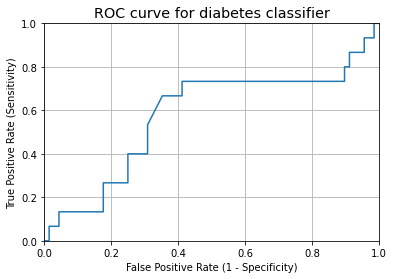

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [43]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

print(evaluate_threshold(0.5))
print(evaluate_threshold(0.4))

Sensitivity: 0.4
Specificity: 0.75
None
Sensitivity: 0.7333333333333333
Specificity: 0.1029411764705882
None


### AUC

AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [44]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(actual_labels, pred_prob))

0.5764705882352941
